In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cdf = pd.read_pickle('data.pkl')
cdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   dailyConf                            86564 non-null  float64       
 7   dailyDeath                           86564 non-null  float64       
 8   dailyRec                             86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

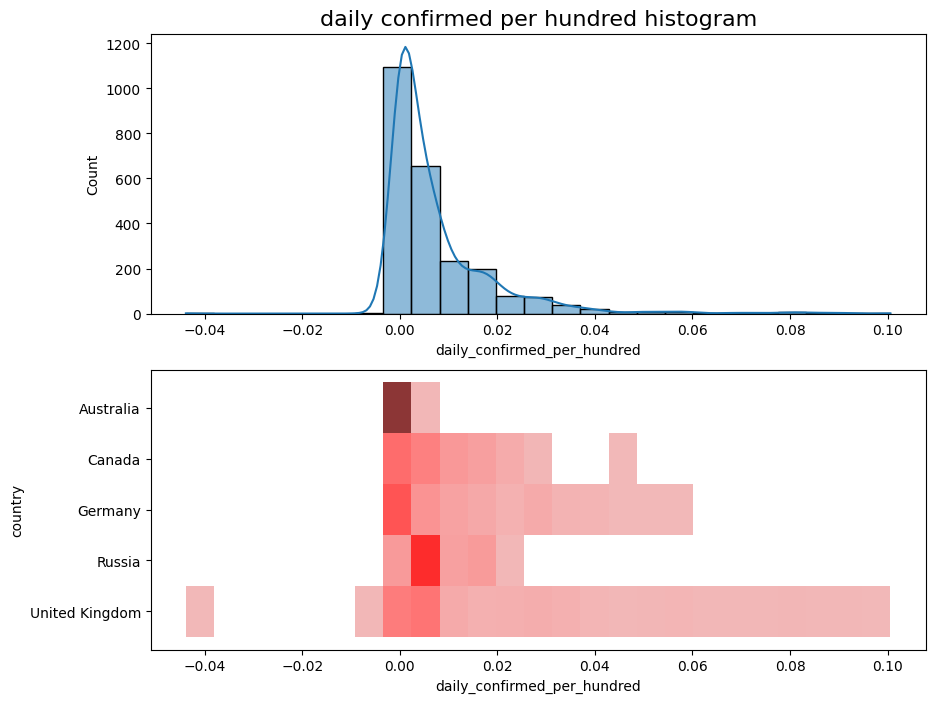

In [2]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
Cropcdf = cdf[cdf['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

Cropcdf = Cropcdf.merge(populations, on=['country'])
Cropcdf['daily_confirmed_per_hundred'] = Cropcdf['dailyConf'] / Cropcdf['population'] * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=Cropcdf,
             x='daily_confirmed_per_hundred', 
             bins=25,
             kde=True, 
             ax=axes[0]);
axes[0].set_title('daily confirmed per hundred histogram', fontsize=16)
sns.histplot(data=Cropcdf, 
             x='daily_confirmed_per_hundred',
             y='country', 
             bins=25, 
             color='red',
             ax=axes[1]);

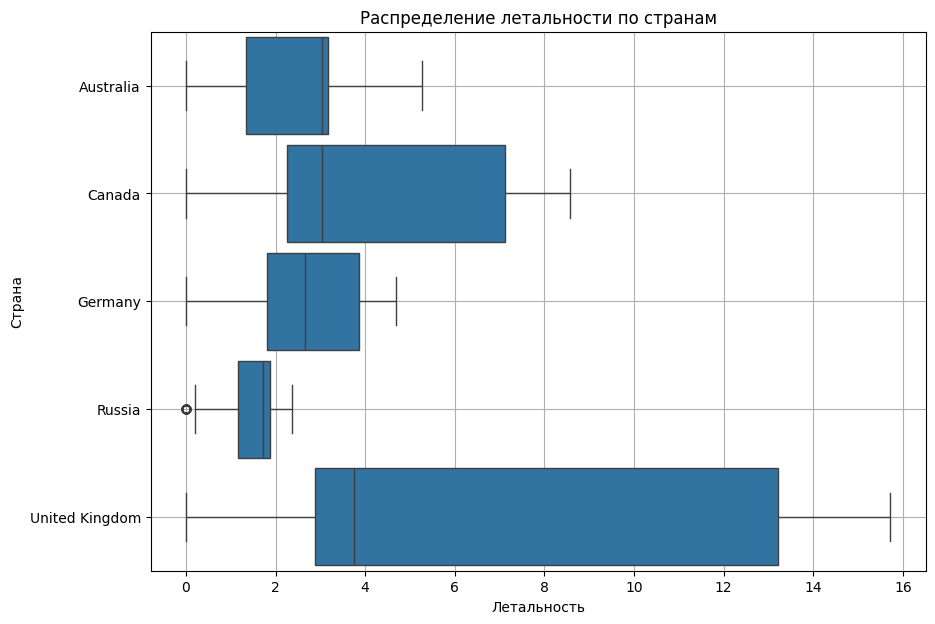

In [3]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(data=Cropcdf,
                      y= 'country', 
                      x= 'deathRate', 
                      orient='h', 
                      width=0.9)
boxplot.set_title('Распределение летальности по странам',);
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

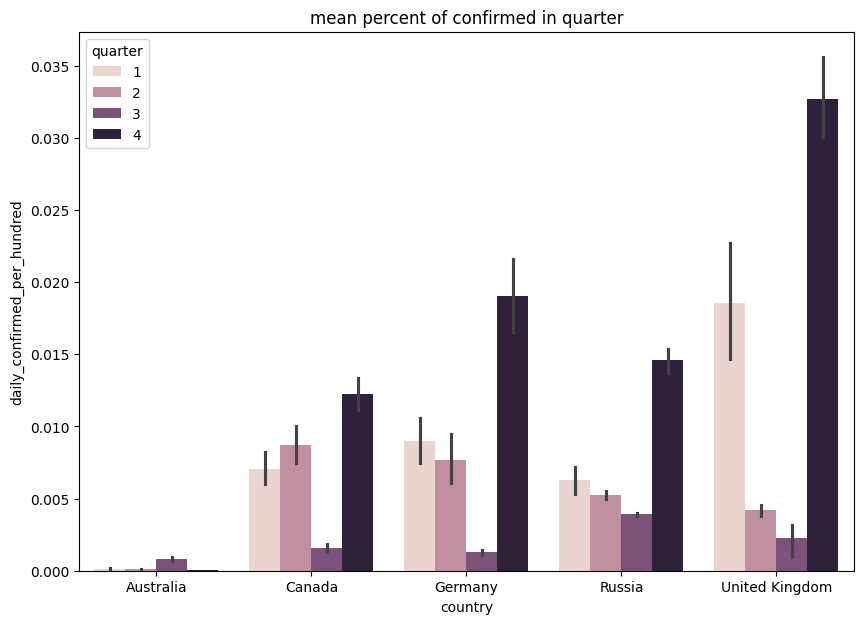

In [4]:
fig = plt.figure(figsize=(10, 7))
Cropcdf['quarter'] = Cropcdf['date'].dt.quarter
barplot = sns.barplot(data=Cropcdf, 
                      x='country', 
                      y = 'daily_confirmed_per_hundred', 
                      hue='quarter',)
barplot.set_title('mean percent of confirmed in quarter');

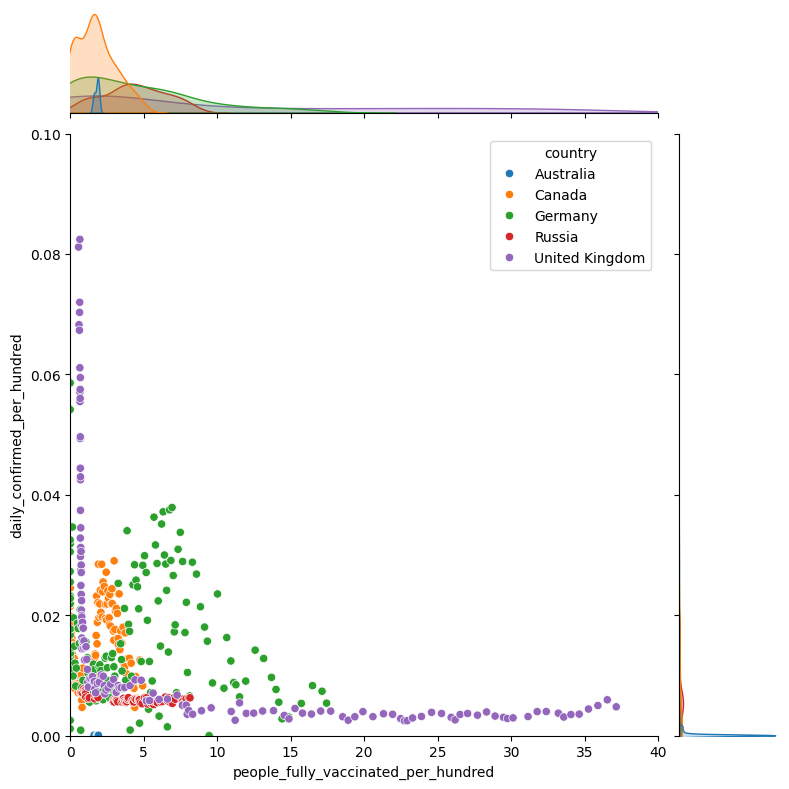

In [5]:
jointplot = sns.jointplot(
    data = Cropcdf, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0, 40),
    ylim=(0, 0.1),
    height=8,
)

In [6]:
pivot = Cropcdf.pivot_table(
    values= 'people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Vaccination heatmap')

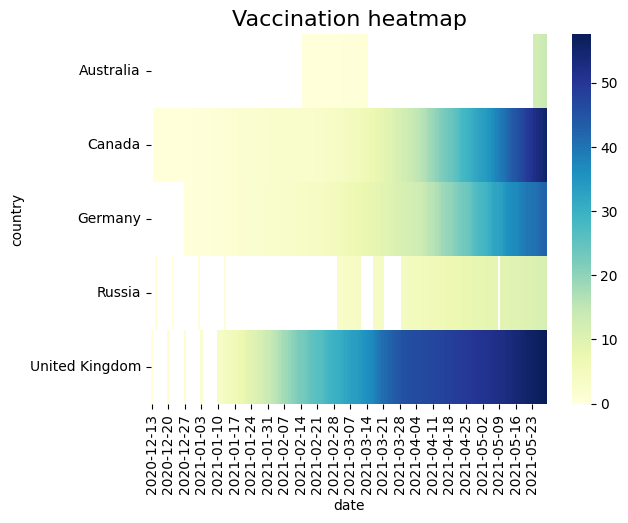

In [7]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Vaccination heatmap', fontsize=16)